In [1]:
from sentence_transformers import models, InputExample, SentenceTransformer
from tqdm import tqdm
import csv
import senteval
import torch
import torch.nn as nn
import json
import os
import gzip
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


DEVICE = "cuda:1"
PATH_TO_MODEL = ""

In [2]:
sts_dataset_path = '../datasets/stsbenchmark.tsv.gz'

if not os.path.exists(sts_dataset_path):
    util.http_get('https://sbert.net/datasets/stsbenchmark.tsv.gz', sts_dataset_path)

test_samples = []
with gzip.open(sts_dataset_path, 'rt', encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        if row['split'] == 'test':
            test_samples.append(row["sentence1"])
            test_samples.append(row["sentence2"])

2024-01-11 02:15:05.297273: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 02:15:05.297302: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 02:15:05.297328: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 02:15:05.303029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


HIDDEN STATE 0


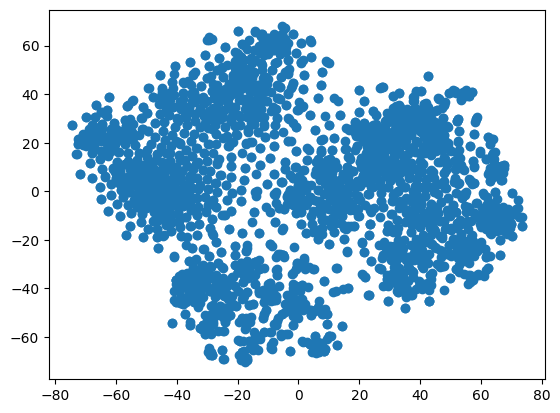

HIDDEN STATE 1


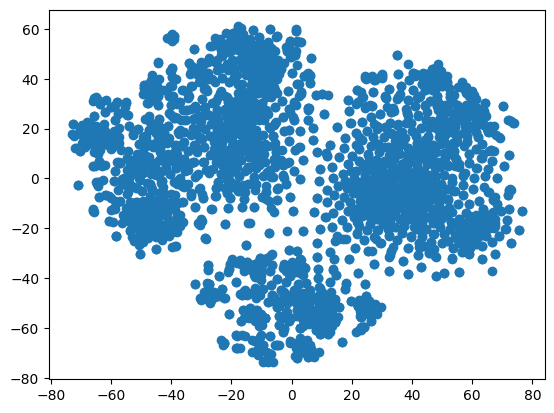

HIDDEN STATE 2


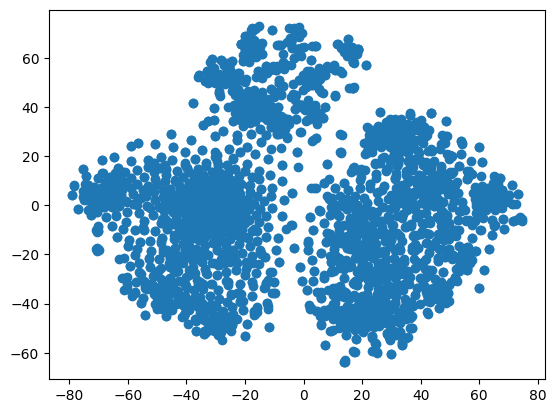

HIDDEN STATE 3


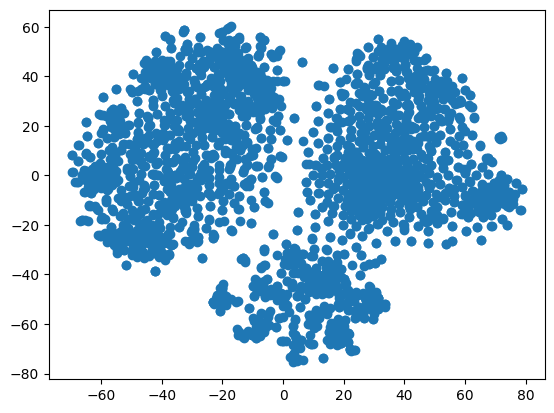

HIDDEN STATE 4


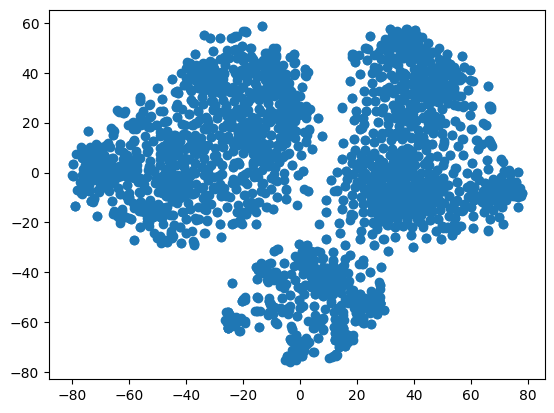

HIDDEN STATE 5


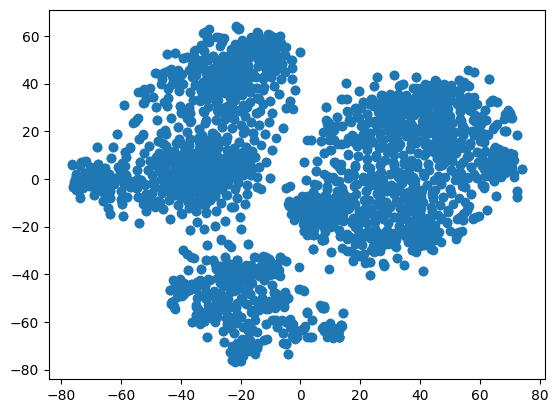

HIDDEN STATE 6


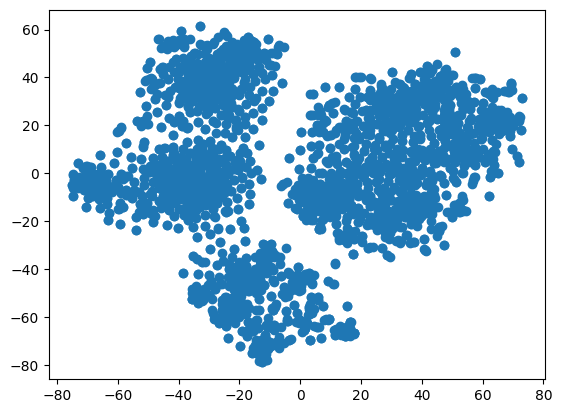

HIDDEN STATE 7


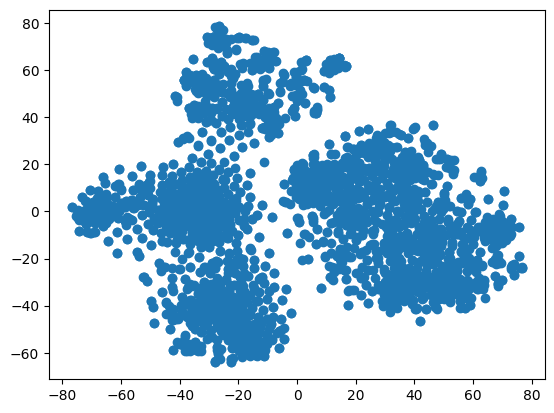

HIDDEN STATE 8


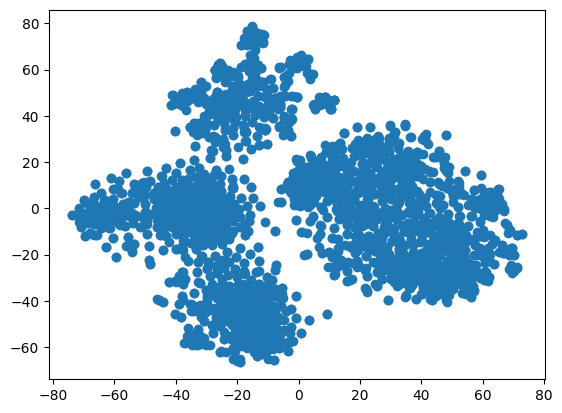

HIDDEN STATE 9


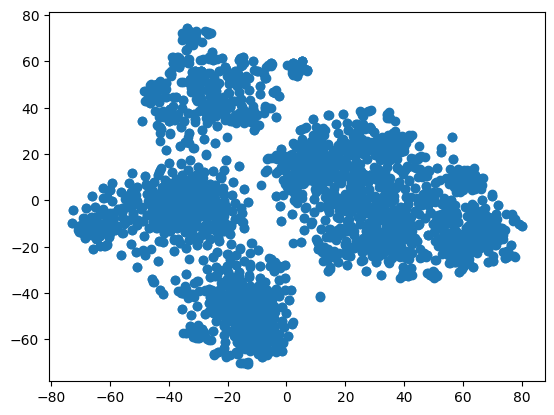

HIDDEN STATE 10


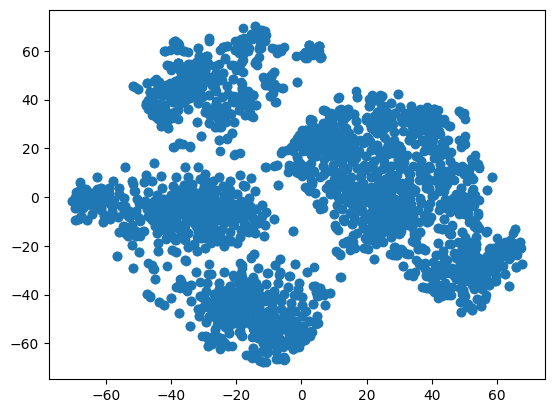

HIDDEN STATE 11


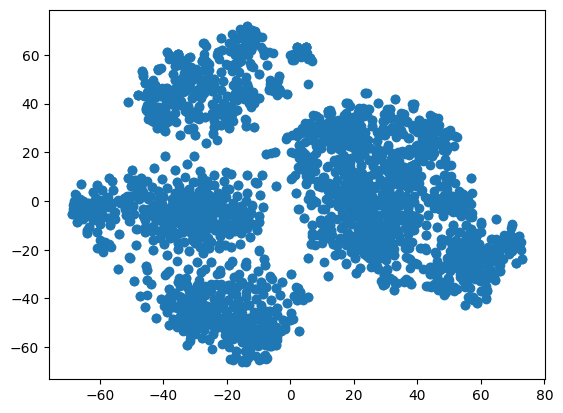

HIDDEN STATE 12


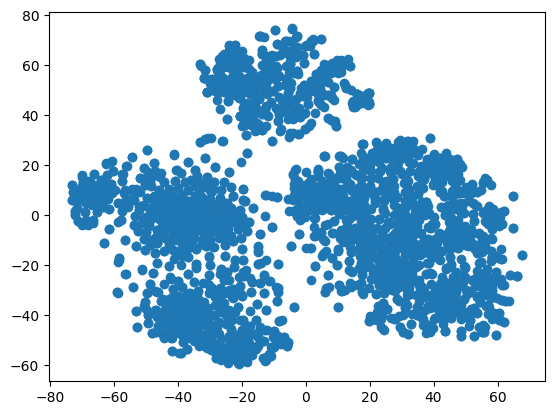

In [3]:
MODEL = "bert-base-cased"

for i in range(13):
    class CustomTransformer(models.Transformer):

        def forward(self, features):
            """Returns token_embeddings, cls_token"""
            trans_features = {'input_ids': features['input_ids'], 'attention_mask': features['attention_mask']}
            if 'token_type_ids' in features:
                trans_features['token_type_ids'] = features['token_type_ids']
            output_states = self.auto_model(**trans_features, output_hidden_states=True)
            output_tokens = output_states.hidden_states[i]
            features.update({'token_embeddings': output_tokens, 'attention_mask': features['attention_mask']})
            return features

    word_embedding_model = CustomTransformer(MODEL)
    if PATH_TO_MODEL != "":
        word_embedding_model.auto_model = torch.load(PATH_TO_MODEL)

    pooling_model = models.Pooling(
        word_embedding_model.get_word_embedding_dimension(),
        pooling_mode_mean_tokens=True,
        pooling_mode_cls_token=False,
        pooling_mode_max_tokens=False
    )
    model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
    encoded = model.encode(test_samples)

    tsne = TSNE()
    transformed = tsne.fit_transform(encoded)

    print(f"HIDDEN STATE {i}")
    plt.scatter(transformed[:, 0], transformed[:, 1])
    plt.show()

HIDDEN STATE 0


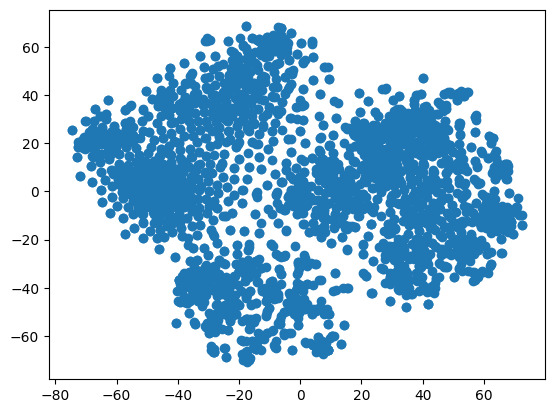

HIDDEN STATE 1


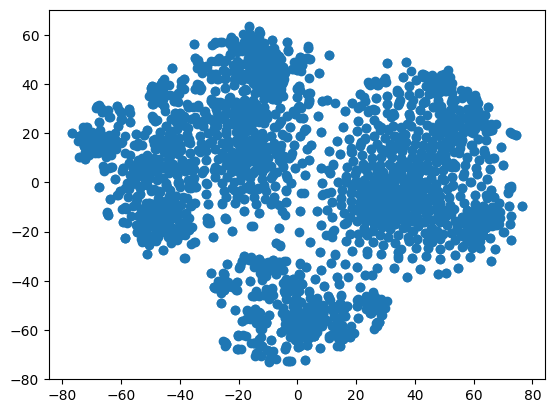

HIDDEN STATE 2


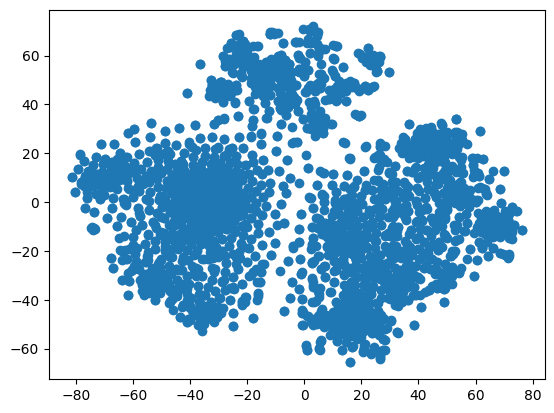

HIDDEN STATE 3


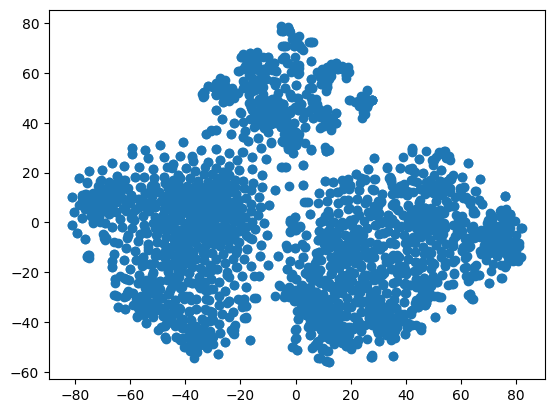

HIDDEN STATE 4


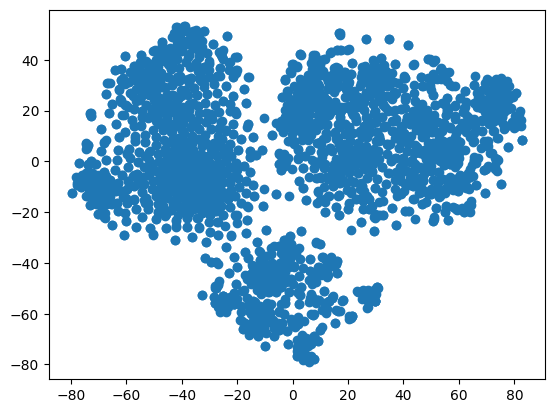

HIDDEN STATE 5


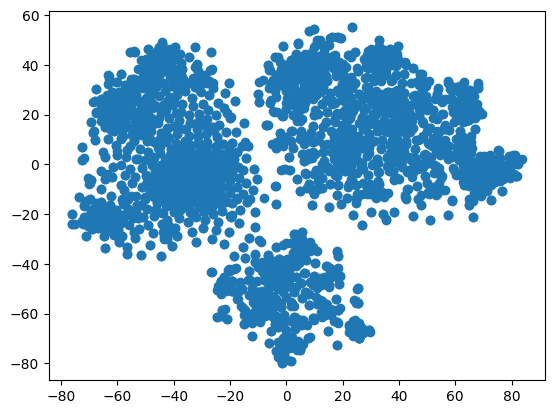

HIDDEN STATE 6


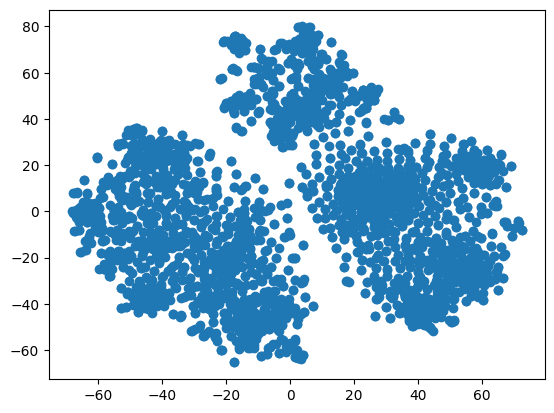

HIDDEN STATE 7


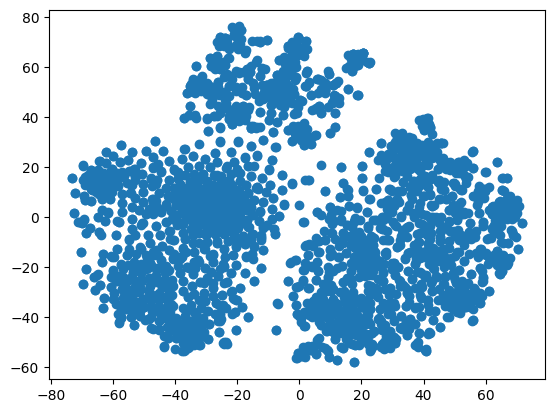

HIDDEN STATE 8


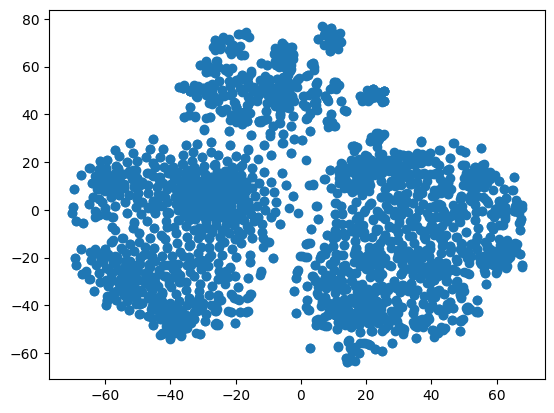

HIDDEN STATE 9


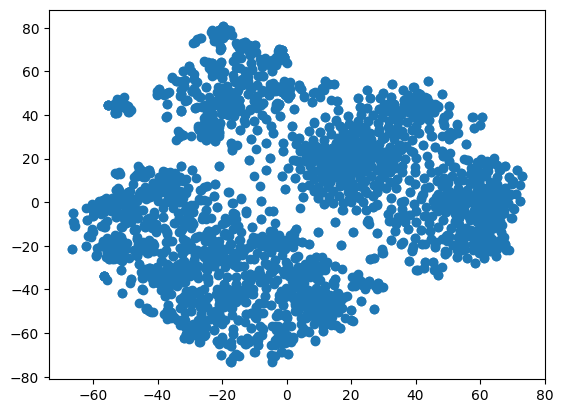

HIDDEN STATE 10


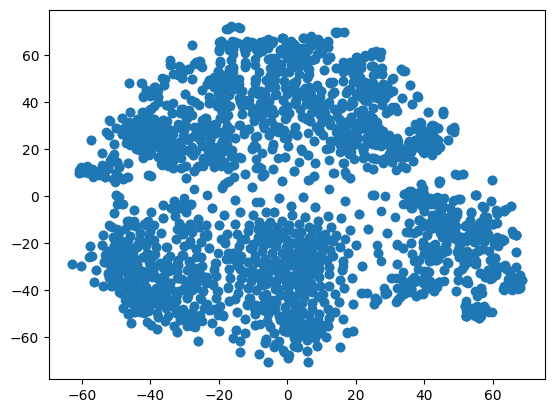

HIDDEN STATE 11


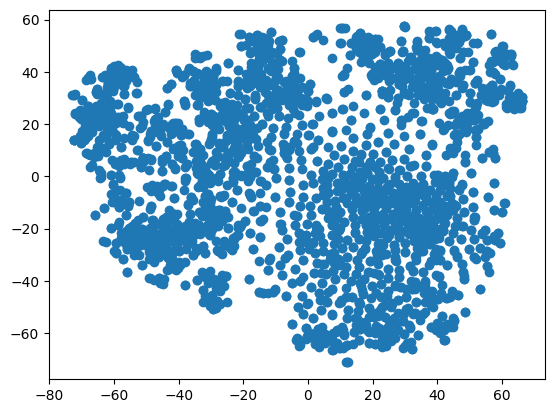

HIDDEN STATE 12


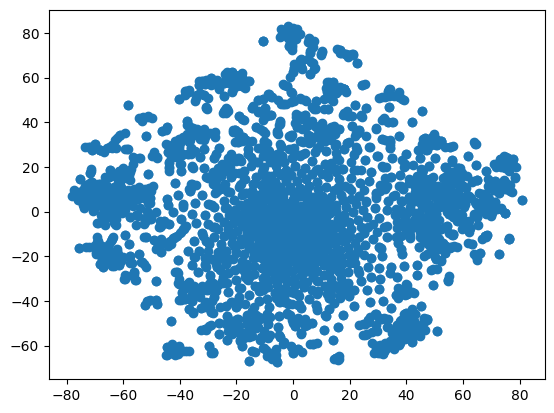

In [4]:
MODEL = "bert-base-cased"
PATH_TO_MODEL = "../output/bert-base-cased/mean/12_to_13/model_2024_01_01_03_16.pkl"

for i in range(13):
    class CustomTransformer(models.Transformer):

        def forward(self, features):
            """Returns token_embeddings, cls_token"""
            trans_features = {'input_ids': features['input_ids'], 'attention_mask': features['attention_mask']}
            if 'token_type_ids' in features:
                trans_features['token_type_ids'] = features['token_type_ids']
            output_states = self.auto_model(**trans_features, output_hidden_states=True)
            output_tokens = output_states.hidden_states[i]
            features.update({'token_embeddings': output_tokens, 'attention_mask': features['attention_mask']})
            return features

    word_embedding_model = CustomTransformer(MODEL)
    if PATH_TO_MODEL != "":
        word_embedding_model.auto_model = torch.load(PATH_TO_MODEL)

    pooling_model = models.Pooling(
        word_embedding_model.get_word_embedding_dimension(),
        pooling_mode_mean_tokens=True,
        pooling_mode_cls_token=False,
        pooling_mode_max_tokens=False
    )
    model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
    encoded = model.encode(test_samples)

    tsne = TSNE()
    transformed = tsne.fit_transform(encoded)

    print(f"HIDDEN STATE {i}")
    plt.scatter(transformed[:, 0], transformed[:, 1])
    plt.show()

2024-01-11 02:20:05.894152: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 02:20:05.894178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 02:20:05.894205: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 02:20:05.899988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


HIDDEN STATE 0


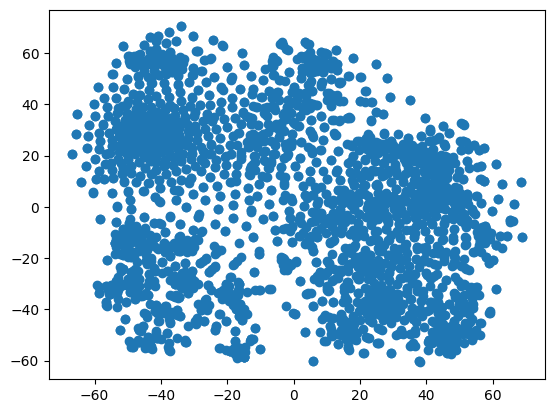

HIDDEN STATE 1


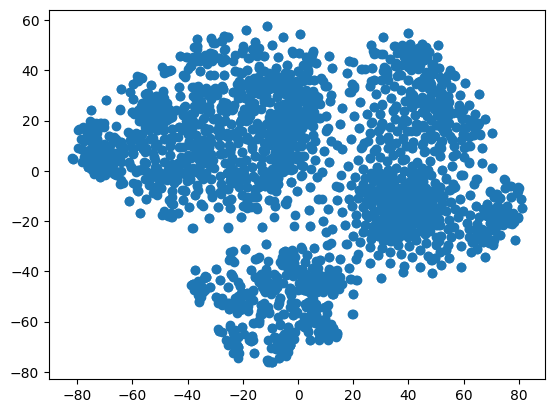

HIDDEN STATE 2


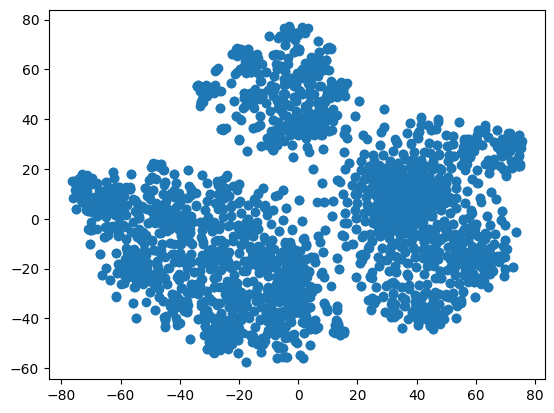

HIDDEN STATE 3


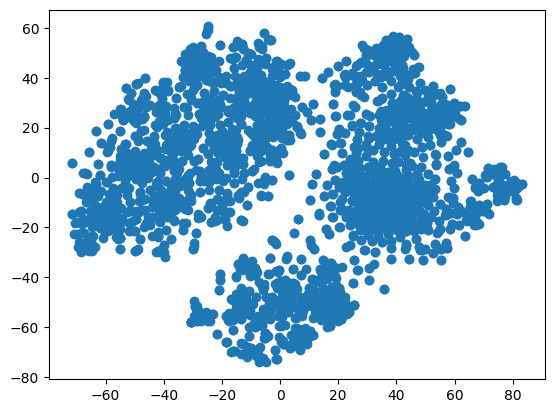

HIDDEN STATE 4


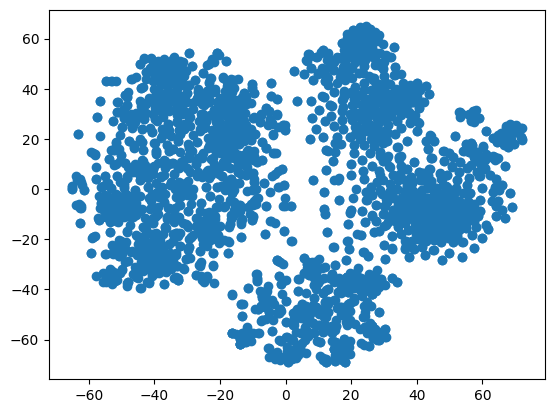

HIDDEN STATE 5


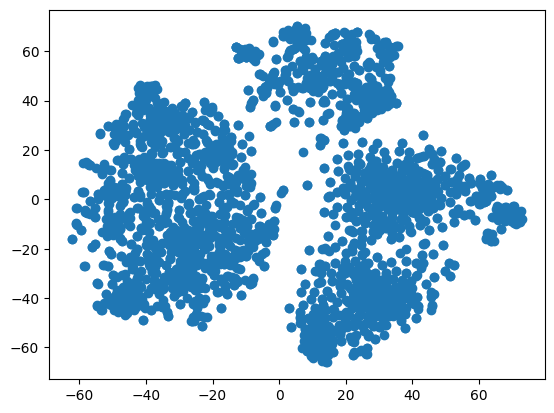

HIDDEN STATE 6


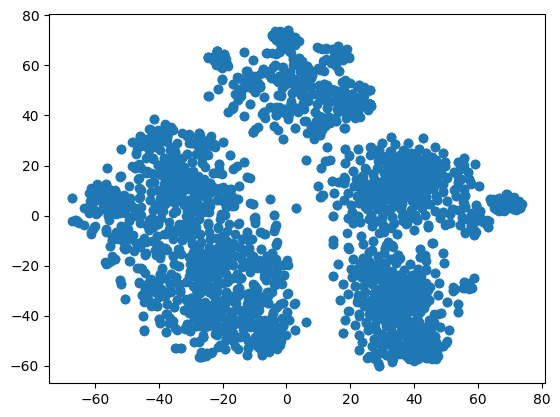

HIDDEN STATE 7


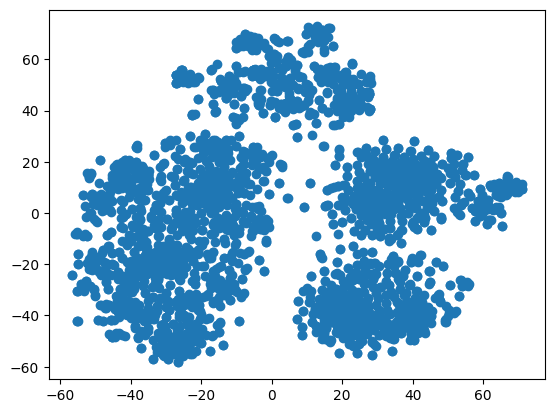

HIDDEN STATE 8


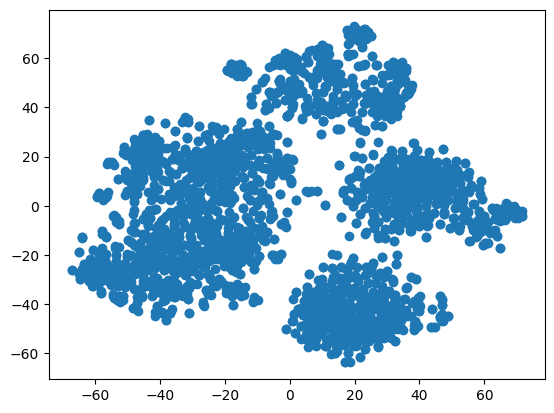

HIDDEN STATE 9


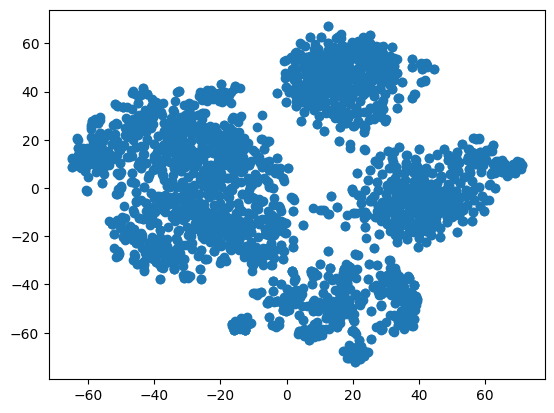

HIDDEN STATE 10


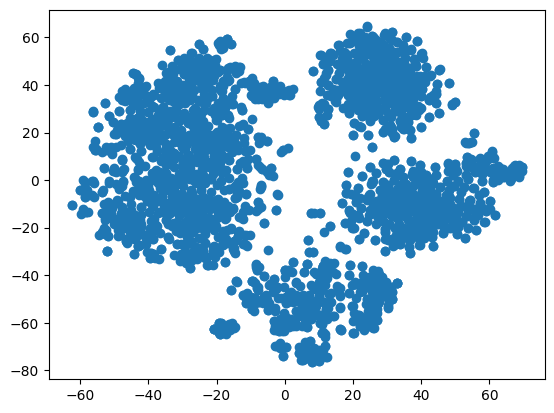

HIDDEN STATE 11


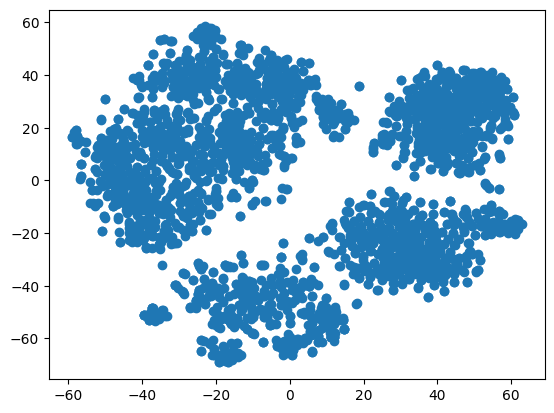

HIDDEN STATE 12


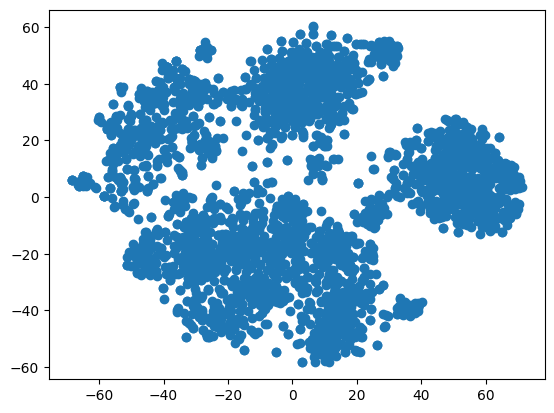

In [3]:
DEVICE="cuda:0"
MODEL = "google/electra-base-discriminator"

for i in range(13):
    class CustomTransformer(models.Transformer):

        def forward(self, features):
            """Returns token_embeddings, cls_token"""
            trans_features = {'input_ids': features['input_ids'], 'attention_mask': features['attention_mask']}
            if 'token_type_ids' in features:
                trans_features['token_type_ids'] = features['token_type_ids']
            output_states = self.auto_model(**trans_features, output_hidden_states=True)
            output_tokens = output_states.hidden_states[i]
            features.update({'token_embeddings': output_tokens, 'attention_mask': features['attention_mask']})
            return features

    word_embedding_model = CustomTransformer(MODEL)
    if PATH_TO_MODEL != "":
        word_embedding_model.auto_model = torch.load(PATH_TO_MODEL)

    pooling_model = models.Pooling(
        word_embedding_model.get_word_embedding_dimension(),
        pooling_mode_mean_tokens=True,
        pooling_mode_cls_token=False,
        pooling_mode_max_tokens=False
    )
    model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
    encoded = model.encode(test_samples)

    tsne = TSNE()
    transformed = tsne.fit_transform(encoded)


    print(f"HIDDEN STATE {i}")
    plt.scatter(transformed[:, 0], transformed[:, 1])
    plt.show()

HIDDEN STATE 0


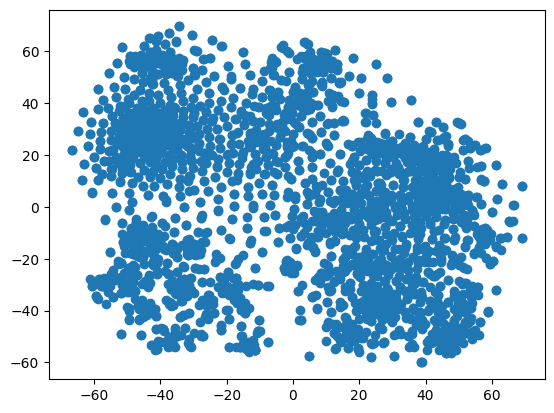

HIDDEN STATE 1


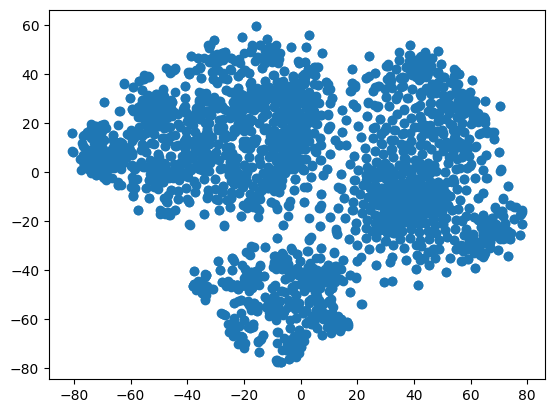

HIDDEN STATE 2


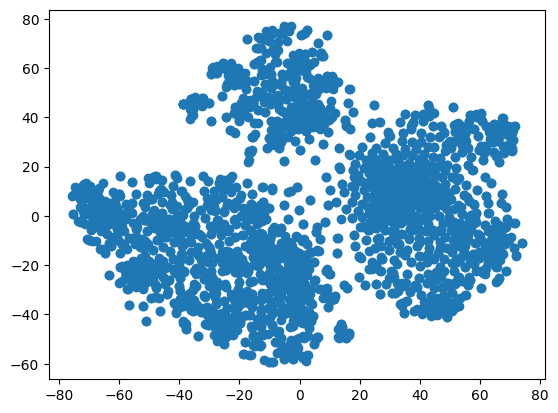

HIDDEN STATE 3


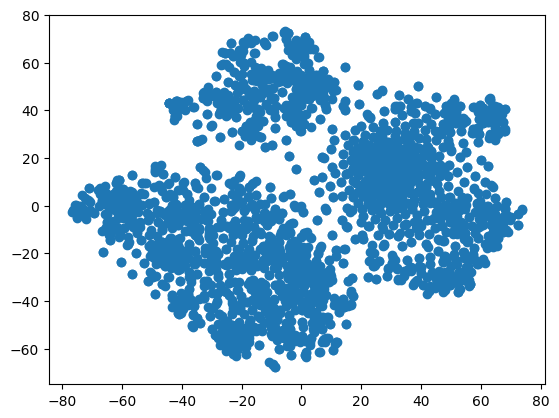

HIDDEN STATE 4


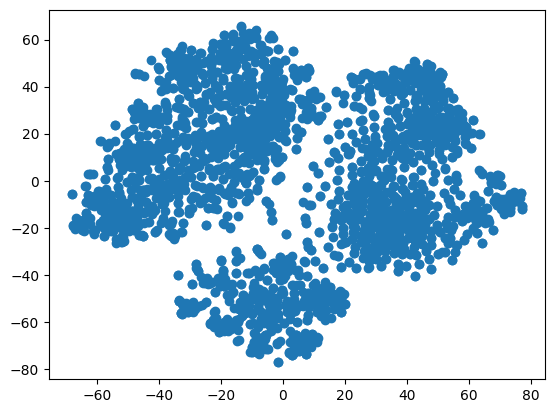

HIDDEN STATE 5


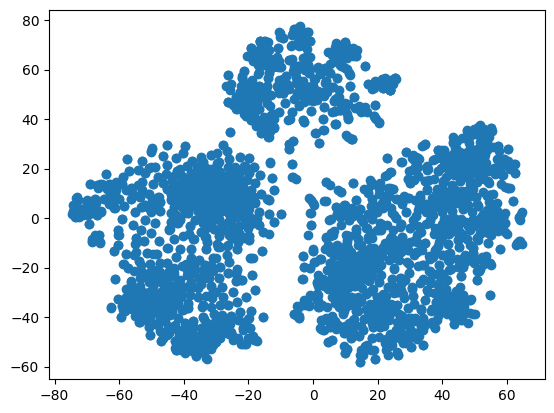

HIDDEN STATE 6


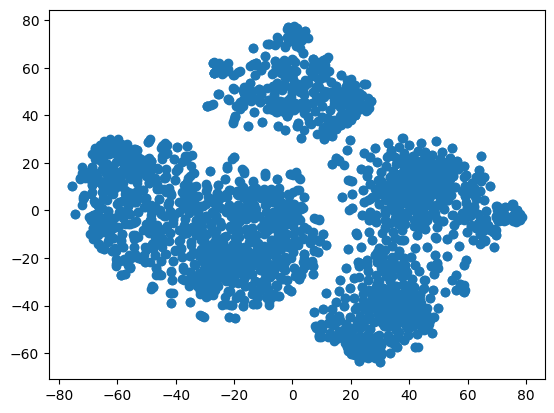

HIDDEN STATE 7


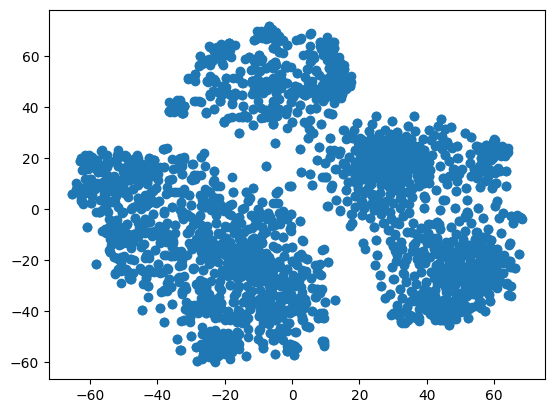

HIDDEN STATE 8


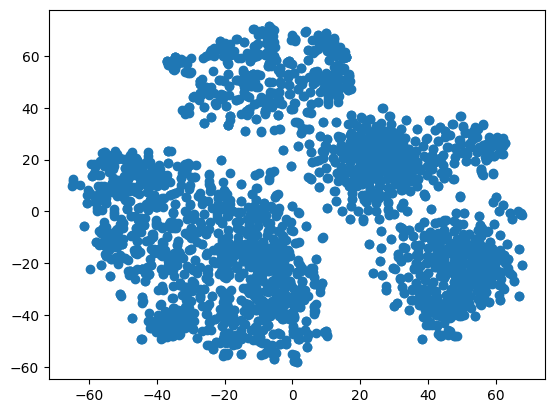

HIDDEN STATE 9


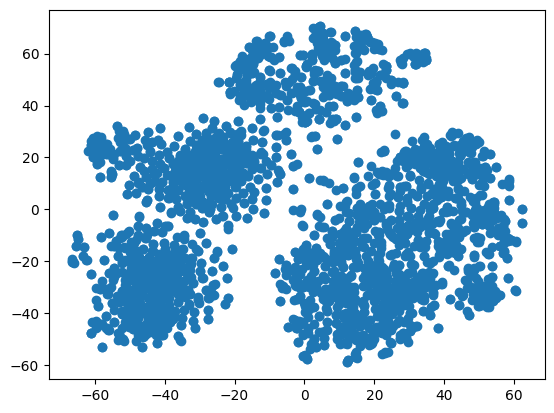

HIDDEN STATE 10


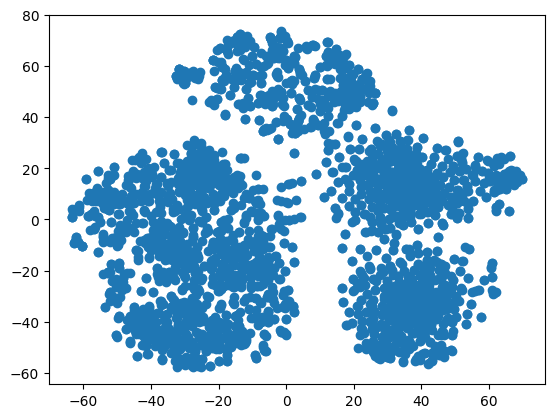

HIDDEN STATE 11


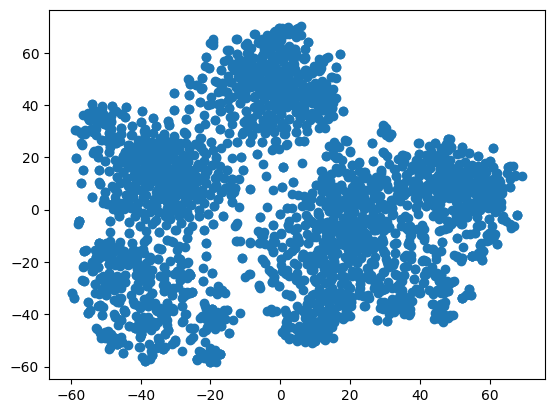

HIDDEN STATE 12


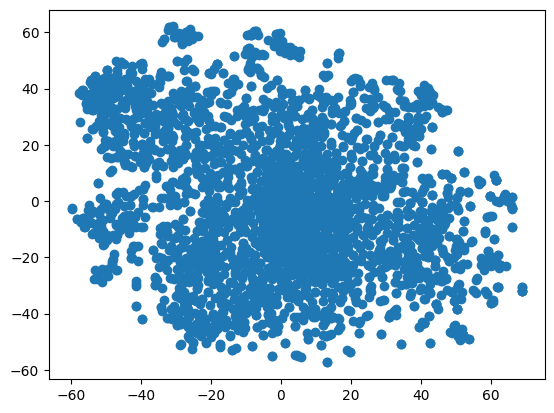

In [4]:
PATH_TO_MODEL = "../output/google-electra-base-discriminator/mean/12_to_13/model_2024_01_01_03_16.pkl"
MODEL = "google/electra-base-discriminator"

for i in range(13):
    class CustomTransformer(models.Transformer):

        def forward(self, features):
            """Returns token_embeddings, cls_token"""
            trans_features = {'input_ids': features['input_ids'], 'attention_mask': features['attention_mask']}
            if 'token_type_ids' in features:
                trans_features['token_type_ids'] = features['token_type_ids']
            output_states = self.auto_model(**trans_features, output_hidden_states=True)
            output_tokens = output_states.hidden_states[i]
            features.update({'token_embeddings': output_tokens, 'attention_mask': features['attention_mask']})
            return features

    word_embedding_model = CustomTransformer(MODEL)
    if PATH_TO_MODEL != "":
        word_embedding_model.auto_model = torch.load(PATH_TO_MODEL)

    pooling_model = models.Pooling(
        word_embedding_model.get_word_embedding_dimension(),
        pooling_mode_mean_tokens=True,
        pooling_mode_cls_token=False,
        pooling_mode_max_tokens=False
    )
    model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
    encoded = model.encode(test_samples)

    tsne = TSNE()
    transformed = tsne.fit_transform(encoded)


    print(f"HIDDEN STATE {i}")
    plt.scatter(transformed[:, 0], transformed[:, 1])
    plt.show()